In [1]:
# ライブラリインポート

## 基本ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 分解
import scipy.stats
from sklearn.model_selection import train_test_split
import my_function

## 学習
from sklearn.tree import DecisionTreeRegressor
import time

In [2]:
# データ読み込み

## csv読み込み
df = pd.read_csv('./available_csv/AirPassengers.csv')
print(df.head())

## データ整形（必要であれば）
df = df['Passengers']
print(df.head())

        Month  Passengers
0  1949-01-01         112
1  1949-02-01         118
2  1949-03-01         132
3  1949-04-01         129
4  1949-05-01         121
0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64


In [3]:
# 分解（singleの場合、整形のみ）

## 正規化
raw_array = scipy.stats.zscore(df)

## データの整形
### default : SlideingWindow = 5
raw_x, raw_y = my_function.sliding_window(raw_array)

## データの分割
raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x, raw_y, test_size=0.1, shuffle=False)

In [4]:
# 学習

## 処理前の時刻
t1 = time.time() 

## ハイパーパラメータ
N_x = 10

## 単体学習
### CART
cart_reg = DecisionTreeRegressor()
cart_model = cart_reg.fit(raw_x_train, raw_y_train)

In [5]:
# 予測

## 単体予測
cart_pred = cart_model.predict(raw_x_test).reshape(-1, 1)

## 処理後の時刻
t2 = time.time()

時間：0.01444554328918457
MSE：0.8815444803830785
RMSE：0.9389060018889424
KLD：7.256613782765381


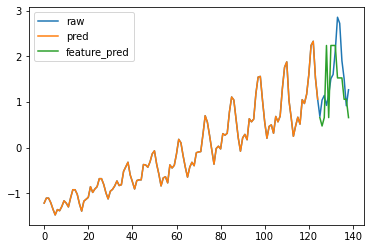

In [6]:
# 評価

## 学習時間
print(f"時間：{t2-t1}")

## 予測精度
print(f"MSE：{my_function.calc_mse(cart_pred, raw_y_test)}")
print(f"RMSE：{my_function.calc_rmse(cart_pred, raw_y_test)}")
print(f"KLD：{my_function.calc_kld(cart_pred, raw_y_test)}")

## cart
plt.figure()
plt.plot(raw_y, label='raw')
plt.plot(cart_model.predict(raw_x_train).reshape(-1, 1), label='pred')
plt.plot(range((len(raw_y)-len(cart_pred)),len(raw_y)),cart_pred, label='feature_pred')
plt.legend()
plt.show()

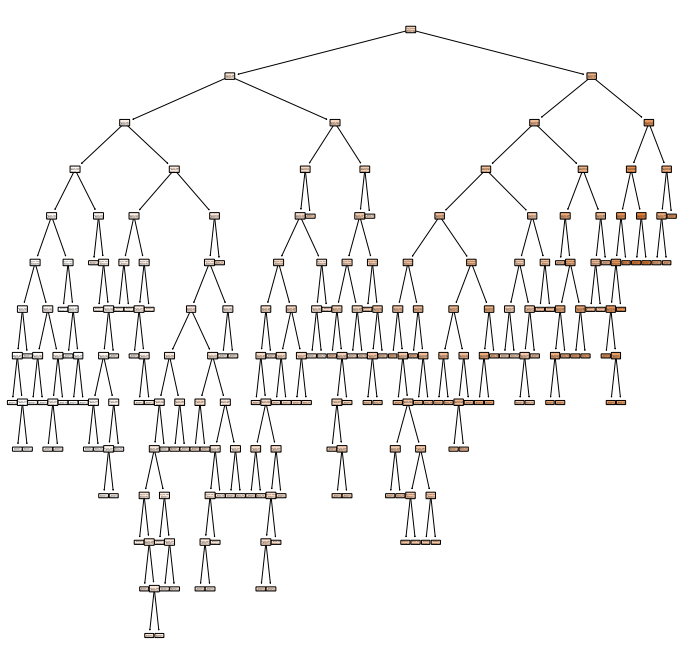

In [7]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

## CART
plt.figure(figsize=(12,12))
plot_tree(
    cart_model,
    filled=True, rounded=True
)
plt.show()